In [3]:
import pandas as pd
import numpy as np
import sklearn
import scipy.stats 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold, cross_val_score
from sklearn import preprocessing
import time
import random

In [4]:
#reading the csv file which has the wine data
df = pd.read_csv('QualityPrediction.csv')

In [5]:
#taking a brief look at the data distribution
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#finding general information about the data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


##### finding out number of unique values of each column 

In [8]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [9]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

C:\Users\well\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

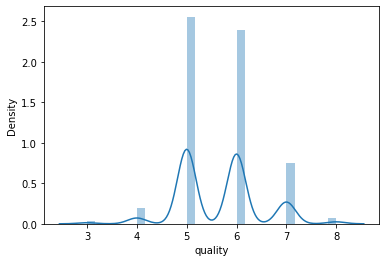

In [10]:
#to find out spread of dependent variable
sns.distplot(df['quality'])

##### Creating density plots for independent variables to visualise the spread of the data

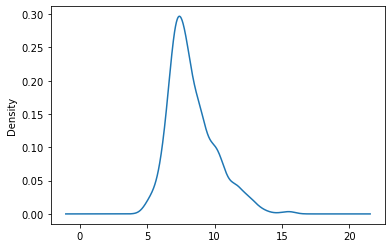

In [9]:

ax=df['fixed acidity'].plot.kde()

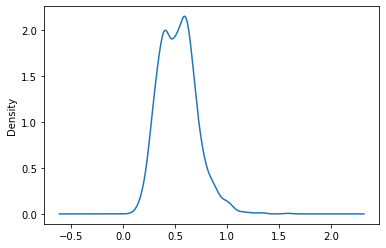

In [10]:
ax=df['volatile acidity'].plot.kde()

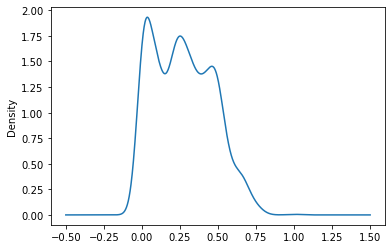

In [11]:
ax=df['citric acid'].plot.kde()

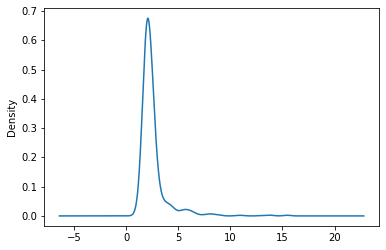

In [12]:
ax=df['residual sugar'].plot.kde()

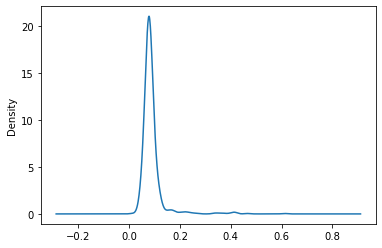

In [13]:
ax=df['chlorides'].plot.kde()

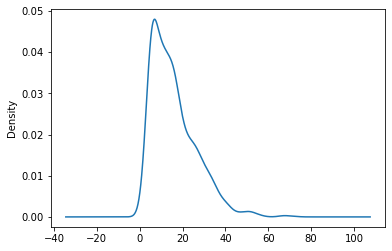

In [14]:
ax=df['free sulfur dioxide'].plot.kde()

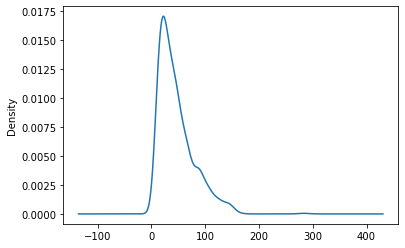

In [15]:
ax=df['total sulfur dioxide'].plot.kde()


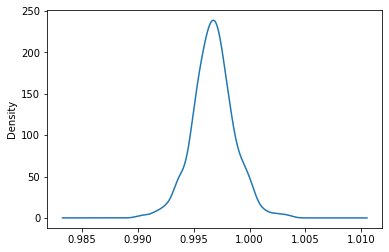

In [16]:
ax=df['density'].plot.kde()

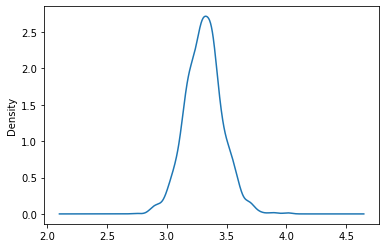

In [17]:
ax=df['pH'].plot.kde()

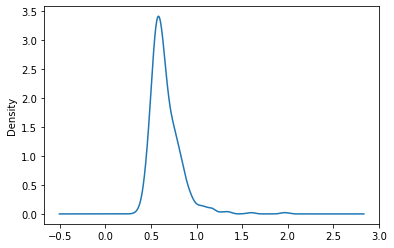

In [18]:
ax=df['sulphates'].plot.kde()

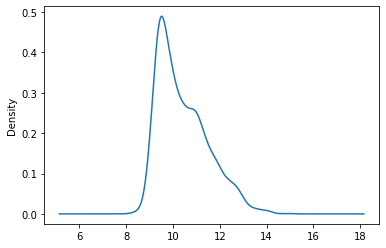

In [19]:
ax=df['alcohol'].plot.kde()

#### VIEWING THE RELATIONSHIP BETWEEN QUALITY AND VARIOUS INDEPENDENT VARIABLES

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

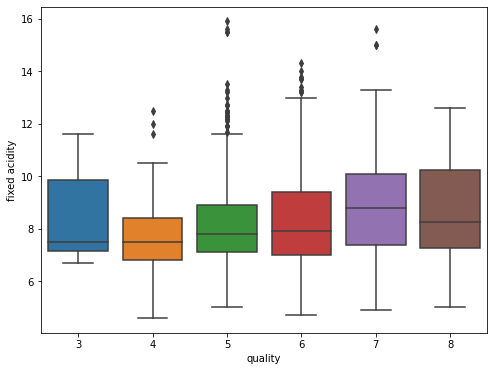

In [20]:
f , ax= plt.subplots(figsize=(8,6))
sns.boxplot(x='quality',y='fixed acidity',data=df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

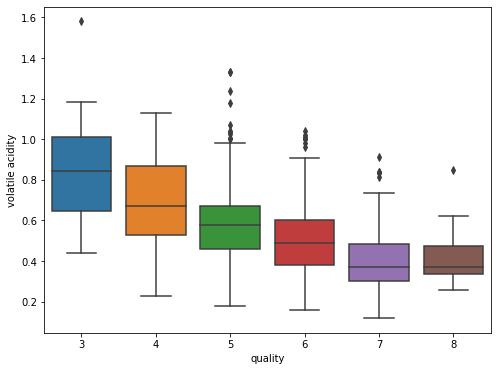

In [21]:
f , ax= plt.subplots(figsize=(8,6))
sns.boxplot(x='quality',y='volatile acidity',data=df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

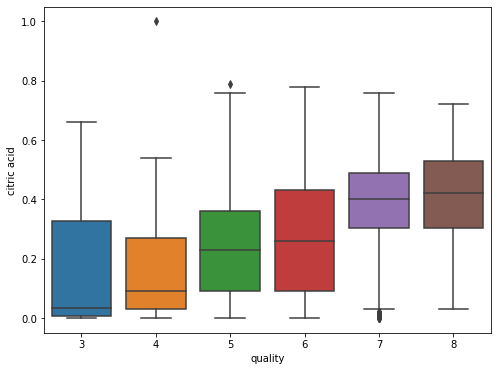

In [22]:
f , ax= plt.subplots(figsize=(8,6))
sns.boxplot(x='quality',y='citric acid',data=df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

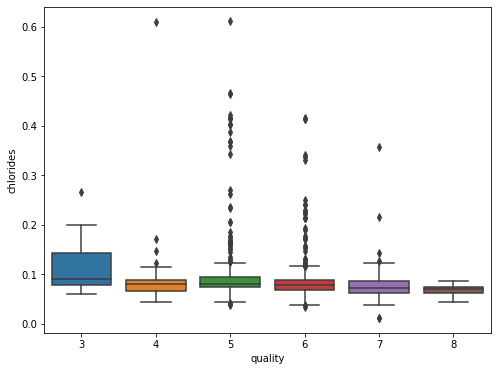

In [23]:
f , ax= plt.subplots(figsize=(8,6))
sns.boxplot(x='quality',y='chlorides',data=df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

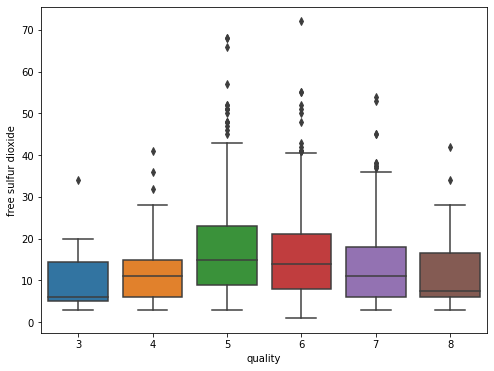

In [24]:
f , ax= plt.subplots(figsize=(8,6))
sns.boxplot(x='quality',y='free sulfur dioxide',data=df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

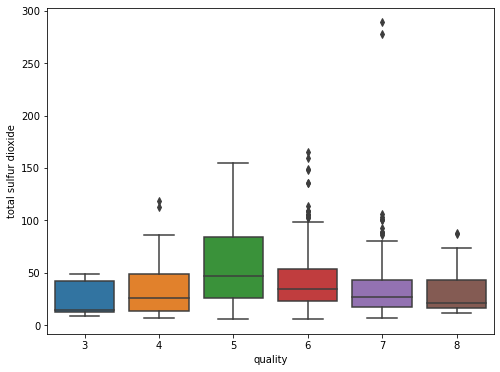

In [25]:
f , ax= plt.subplots(figsize=(8,6))
sns.boxplot(x='quality',y='total sulfur dioxide',data=df)

<AxesSubplot:xlabel='quality', ylabel='density'>

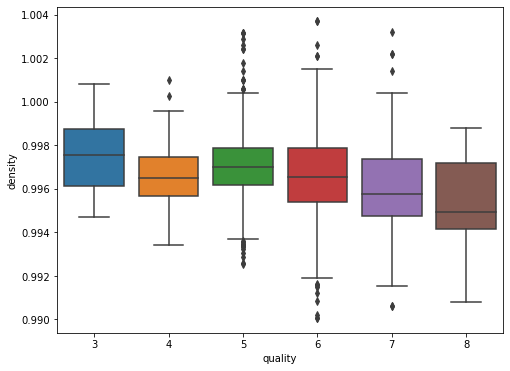

In [26]:
f , ax= plt.subplots(figsize=(8,6))
sns.boxplot(x='quality',y='density',data=df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

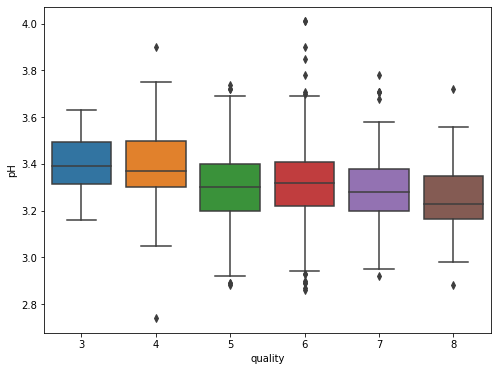

In [27]:
f , ax= plt.subplots(figsize=(8,6))
sns.boxplot(x='quality',y='pH',data=df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

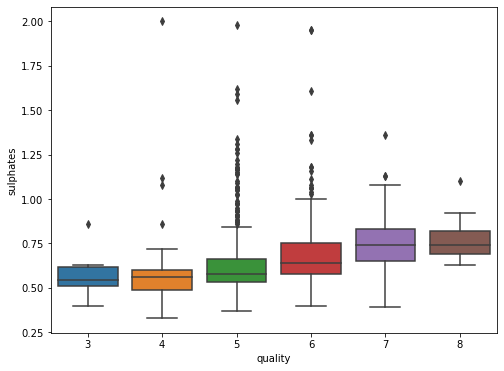

In [28]:
f , ax= plt.subplots(figsize=(8,6))
sns.boxplot(x='quality',y='sulphates',data=df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

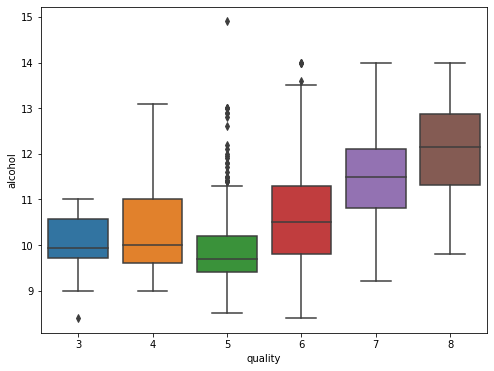

In [29]:
f , ax= plt.subplots(figsize=(8,6))
sns.boxplot(x='quality',y='alcohol',data=df)

#### visualising the correlation between variables through hetamap

<AxesSubplot:>

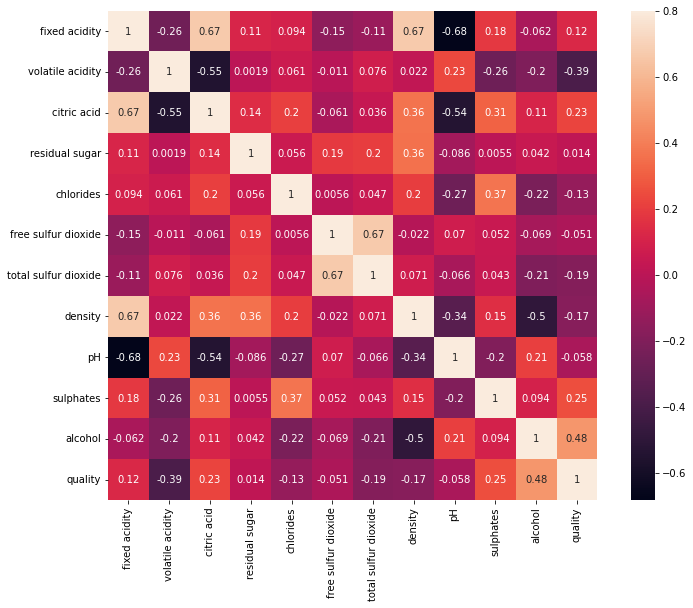

In [30]:
corrmat=df.corr()
fig,axes=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True,annot=True)

###### making a copy of the dataframe to drop some variables based on vif

In [11]:
 new_df=pd.get_dummies(df)

##### finding out multicollinearity between independent variables using VIF

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

X =new_df.drop(['quality'],axis =1)
cal_vif(X)

,variables,VIF
0,fixed acidity,74.452265
1,volatile acidity,17.060026
2,citric acid,9.183495
3,residual sugar,4.662992
4,chlorides,6.554877
5,free sulfur dioxide,6.442682
6,total sulfur dioxide,6.519699
7,density,1479.287209
8,pH,1070.967685
9,sulphates,21.590621


In [13]:
#dropping density variable and calculating vif again
X=new_df.drop(['quality','density','pH'],axis=1)
cal_vif(X)

,variables,VIF
0,fixed acidity,37.557809
1,volatile acidity,15.651760
2,citric acid,8.636667
3,residual sugar,4.660704
4,chlorides,5.935002
5,free sulfur dioxide,6.357695
6,total sulfur dioxide,5.987189
7,sulphates,21.218142
8,alcohol,37.137148


### Data Preprocessing

In [14]:
y=df['quality']

In [15]:
# Converting the quality variable values to 1 and 0. 1 being high quality and 0 low quality
df['best quality']=[1 if i>=6 else 0 for i in y]
df['best quality'].value_counts()

1    855
0    744
Name: best quality, dtype: int64

In [16]:
#taking out the dependent variable that is quality  separately
y=df['best quality'].values
x=df.drop(['best quality','quality'],axis=1).values

###### splitting the data for training and testing

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)
# Cleaning test sets to avoid future warning messages
standard_Scaler=StandardScaler()
x_train = standard_Scaler.fit_transform(x_train)
x_test = standard_Scaler.fit_transform(x_test)

y_train =y_train.ravel() 
y_test = y_test.ravel() 


In [29]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42)

##### Hyper-Parameter Optimization using GridSearchCV

In [30]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4,5,6],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_train,y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto'}
Time taken in grid search:  116.34


In [32]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 6,
                 bootstrap= True)

RandomForestClassifier(max_depth=6, random_state=42)

##### OOB Rate

In [33]:
fit_rf.set_params(warm_start=True,oob_score=True)

min_estimators = 100
max_estimators = 500

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(x_train,y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [34]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 100 to 500 trees)')

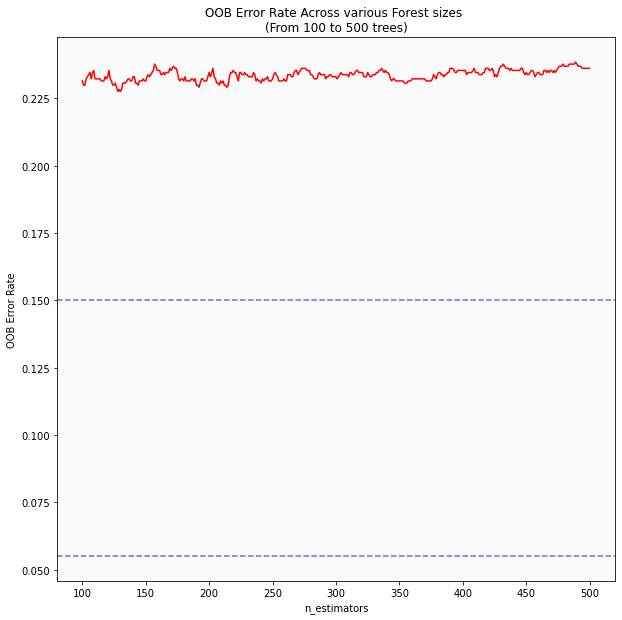

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.055, color='#875FDB',linestyle='--')
plt.axhline(0.15, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 100 to 500 trees)')

In [36]:
print('OOB Error rate for 340 trees is: {0:.5f}'.format(oob_series[340]))

OOB Error rate for 340 trees is: 0.23456


In [37]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators=340,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(max_depth=6, n_estimators=340, random_state=42)

In [38]:
fit_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, n_estimators=340, random_state=42)

In [39]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [40]:
var_imp_rf = variable_importance(fit_rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']
names=['fixed acidity','volatile acidity','citric acid',
       'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide',
       'density','pH','sulphates','alcohol']
names_index=names[0:]

In [41]:
def print_var_importance(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns
    ----------
    Prints feature importance in descending order
    """
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      name_index[indices[i]],
                      importance[indices[f]]))

In [42]:
print_var_importance(importances_rf, indices_rf, names_index)

Feature ranking:
1. The feature 'alcohol' has a Mean Decrease in Impurity of 0.28065
2. The feature 'sulphates' has a Mean Decrease in Impurity of 0.16059
3. The feature 'volatile acidity' has a Mean Decrease in Impurity of 0.13131
4. The feature 'total sulfur dioxide' has a Mean Decrease in Impurity of 0.09890
5. The feature 'density' has a Mean Decrease in Impurity of 0.08370
6. The feature 'chlorides' has a Mean Decrease in Impurity of 0.04807
7. The feature 'fixed acidity' has a Mean Decrease in Impurity of 0.04669
8. The feature 'citric acid' has a Mean Decrease in Impurity of 0.04310
9. The feature 'pH' has a Mean Decrease in Impurity of 0.04049
10. The feature 'free sulfur dioxide' has a Mean Decrease in Impurity of 0.03386
11. The feature 'residual sugar' has a Mean Decrease in Impurity of 0.03265


In [43]:
def variable_importance_plot(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints bar chart detailing variable importance for CART model
    NOTE: feature_space list was created because the bar chart
    was transposed and index would be in incorrect order.

    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns:
    ----------
    Returns variable importance plot in descending order
    """
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(5, 5))

    #ax.set_axis_bgcolor('#fafafa')
    plt.title('Feature importances for Random Forest Model')
    plt.barh(index,
             importance_desc,
             align="center",
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    plt.ylim(0, 20)
    plt.xlim(0, max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')

    plt.show()
    plt.close()

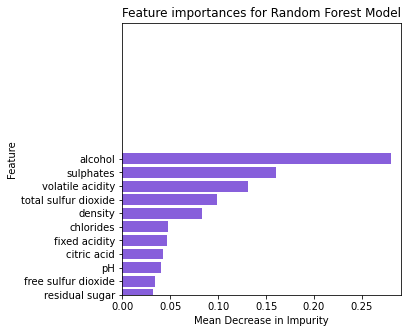

In [44]:
variable_importance_plot(importances_rf, indices_rf, names_index)

In [45]:
predictions_rf = fit_rf.predict(x_test)

In [46]:
def create_conf_mat(y_test, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(y_test.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (y_test.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = y_test,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

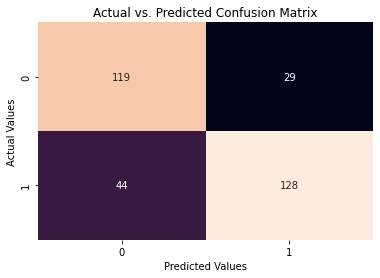

In [47]:
conf_mat = create_conf_mat(y_test, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [48]:
accuracy_rf = fit_rf.score(x_test,y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.772


In [49]:
# Here we calculate the test error rate!
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.2281


In [50]:
# We grab the second array from the output which corresponds to
# to the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class
predictions_prob = fit_rf.predict_proba(x_test)[:, 1]

fpr2, tpr2, _ = roc_curve(y_test,
                          predictions_prob,
                          pos_label = 1)

In [51]:
auc_rf = auc(fpr2, tpr2)

In [52]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    * fpr: Array returned from sklearn.metrics.roc_curve for increasing
            false positive rates
    * tpr: Array returned from sklearn.metrics.roc_curve for increasing
            true positive rates
    * auc: Float returned from sklearn.metrics.auc (Area under Curve)
    * estimator: String represenation of appropriate model, can only contain the
    following: ['knn', 'rf', 'nn']
    * xlim: Set upper and lower x-limits
    * ylim: Set upper and lower y-limits
    """
    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'nn': ['Neural Network', 'purple']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

C:\Users\well\AppData\Local\Temp/ipykernel_2388/2153116955.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
C:\Users\well\AppData\Local\Temp/ipykernel_2388/2153116955.py:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')


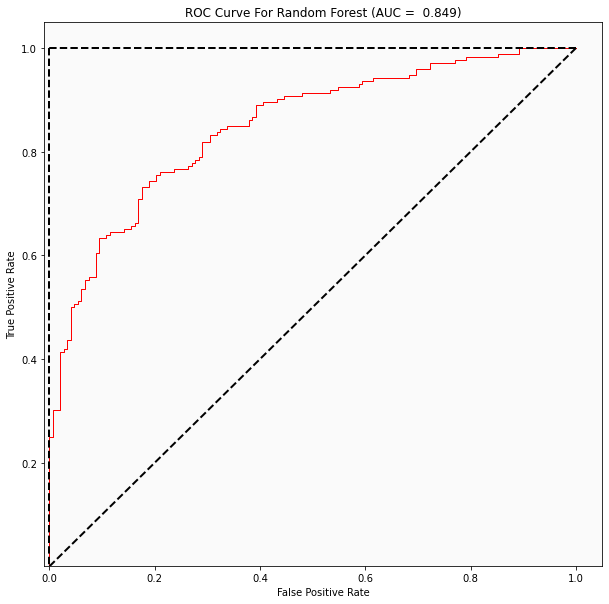

In [53]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

In [54]:
def print_class_report(predictions, alg_name):
    """
    Purpose
    ----------
    Function helps automate the report generated by the
    sklearn package. Useful for multiple model comparison

    Parameters:
    ----------
    predictions: The predictions made by the algorithm used
    alg_name: String containing the name of the algorithm used
    
    Returns:
    ----------
    Returns classification report generated from sklearn. 
    """
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(predictions, 
            y_test, 
            target_names = dx))

In [55]:
dx=['Bad','Good']
class_report = print_class_report(predictions_rf, 'Random Forest')

Classification Report for Random Forest:
              precision    recall  f1-score   support

         Bad       0.80      0.73      0.77       163
        Good       0.74      0.82      0.78       157

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320



In [ ]:
#Trying to improve accuracy by dropping the pH variable as it had high multicollinearity with other variables. 
#Not dropping density since in variable importance we see that it has comparitively more importance

In [27]:
y1=df['best quality'].values
x1=df.drop(['best quality','quality','pH'],axis=1).values

In [28]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size =0.2)
# Cleaning test sets to avoid future warning messages
y1_train =y1_train.ravel() 
y1_test = y_test.ravel() 

In [29]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4,5,6],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x1_train,y1_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto'}
Time taken in grid search:  104.57


In [37]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 6,
                 bootstrap= True)

RandomForestClassifier(max_depth=6, oob_score=True, random_state=42,
                       warm_start=True)

In [39]:
fit_rf.set_params(warm_start=True,oob_score=True)

min_estimators = 100
max_estimators = 800

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(x1_train,y1_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

ValueError: n_estimators=100 must be larger or equal to len(estimators_)=814 when warm_start==True

In [ ]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.055, color='#875FDB',linestyle='--')
plt.axhline(0.15, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 100 to 100 trees)')